# _Dataviz Code Session_: Dados Geoespaciais

## Objetivos da DCS

- Aplicar técnicas de dataviz para plotagem e manipulação de representações visuais geoespaciais relacionadas a campos e poços de petróleo em bacias sedimentares brasileiras.

## Ferramentas utilizadas

- Módulos Python
    - `numpy`
    - `pandas`
    - `matplotlib`
    - `seaborn`
    - `geopandas`

## Aplicação do modelo referencial

- Vide {numref}`Capítulo %s <cap:estetica>`.

In [9]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sb, geopandas as geo

In [10]:
from warnings import filterwarnings; filterwarnings('ignore');

### Dados de entrada

- Shapefiles dos campos de produção (ANP) - [[Fonte]](https://www.gov.br/anp/pt-br/assuntos/exploracao-e-producao-de-oleo-e-gas/dados-tecnicos/shapefile-de-dados) 

In [11]:
geocp = geo.read_file('../data/ANP_campos_shp/CAMPOS_PRODUCAO_SIRGASPolygon.shp')

In [12]:
geocp

,NUM_RODADA,NOM_CAMPO,AREA,OPERADOR_C,NUM_CONTRA,DAT_ASSINA,DAT_TERMIN,NOM_BACIA,COD_CAMPO,SIG_CAMPO,DAT_DESCOB,DAT_INICIO,ETAPA,MED_LAMINA,FLUIDO_PRI,ID,geometry
0,Rodada 11,IRARA,6.0,BGM Petróleo e Gás Ltda.,48610005457201381,None,None,Espírito Santo,4841.0,IRAR,03/01/2022,13/07/2022,Produção,0.0,ÓLEO,2460.0,"POLYGON ((-39.81288 -19.25048, -39.81288 -19.2..."
1,Rodada 0,PESCADA,55.0,Petróleo Brasileiro S.A.,480000039129784,06-08-1998,None,Potiguar,213.0,PE,24-10-1980,01-05-1999,Produção,19.0,GÁS,1100.0,"POLYGON ((-36.76596 -4.73997, -36.76856 -4.739..."
2,Rodada 0,SALGO,11.0,Petróleo Brasileiro S.A.,480000038419738,06-08-1998,None,Sergipe,275.0,SG,01-12-1984,31-12-1986,Em Devolução,14.0,ÓLEO,1102.0,"POLYGON ((-36.57586 -10.63324, -36.57846 -10.6..."
3,Rodada 0,CAXAREU,34.0,Petróleo Brasileiro S.A.,480000035609749,06/08/1998,None,Campos,1164.0,CXR,07-08-2002,None,Desenvolvimento,1141.0,ÓLEO,1125.0,"POLYGON ((-40.07812 -21.39323, -40.07812 -21.3..."
4,Rodada 0,CEXIS,54.0,3R Candeias S.A.,480000036419749,06-08-1998,None,Recôncavo,88.0,CX,07-03-1966,30-06-1966,Produção,0.0,GÁS,1126.0,"POLYGON ((-38.4639 -12.62544, -38.4613 -12.625..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,AM2,Porto do Mangue,6.0,Máxima 07 Exploração e Produção de Petróleo Ltda,48610007488200648,None,None,Potiguar,4535.0,4201,10/10/2011,None,Plano de Avaliação (Teste de longa duração),0.0,None,2623.0,"POLYGON ((-36.79461 -5.09674, -36.79461 -5.099..."
423,Rodada 0,MIRANGA LESTE,1.0,Petróleo Brasileiro S.A.,480000036759761,None,None,Recôncavo,182.0,MGL,None,None,Em Devolução,0.0,OUTROS,2661.0,"POLYGON ((-38.14358 -12.32336, -38.14619 -12.3..."
424,Rodada 13 (AM),SÃO JOÃO,6.0,Petro-Victory Energia Ltda.,48610002005201691,12/5/2016,None,Barreirinhas,4695.0,SJ,01/08/1966,01/07/2020,Produção,0.0,Óleo,2662.0,"POLYGON ((-43.32852 -2.59932, -43.32852 -2.596..."
425,Rodada 9,GAVIÃO CARIJÓ,163.0,Eneva S.A.,48610001413200815,None,None,Parnaíba,4629.0,GVCA,None,None,Desenvolvimento,0.0,GÁS,2700.0,"POLYGON ((-44.33073 -5.66927, -44.33073 -5.684..."


- Shapefiles do território nacional

In [13]:
geobr = geo.read_file('../data/gadm36_BRA_shp/gadm36_BRA_1.shp')

In [14]:
geobr

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,BRA,Brazil,BRA.1_1,Acre,None,None,Estado,State,None,BR.AC,"POLYGON ((-68.10553 -10.72192, -68.10547 -10.7..."
1,BRA,Brazil,BRA.2_1,Alagoas,None,None,Estado,State,None,BR.AL,"MULTIPOLYGON (((-35.88986 -9.84431, -35.88986 ..."
2,BRA,Brazil,BRA.3_1,Amapá,None,None,Estado,State,None,BR.AP,"MULTIPOLYGON (((-50.8257 2.52208, -50.8257 2.5..."
3,BRA,Brazil,BRA.4_1,Amazonas,Amazone,None,Estado,State,None,BR.AM,"POLYGON ((-58.13699 -7.35614, -58.13682 -7.356..."
4,BRA,Brazil,BRA.5_1,Bahia,Ba¡a,None,Estado,State,None,BR.BA,"MULTIPOLYGON (((-38.69208 -17.95958, -38.69208..."
5,BRA,Brazil,BRA.6_1,Ceará,None,None,Estado,State,None,BR.CE,"MULTIPOLYGON (((-40.83181 -2.88125, -40.83181 ..."
6,BRA,Brazil,BRA.7_1,Distrito Federal,None,None,Distrito Federal,Federal District,None,BR.DF,"POLYGON ((-47.93915 -16.05135, -48.0211 -16.05..."
7,BRA,Brazil,BRA.8_1,Espírito Santo,Espiritu Santo,None,Estado,State,None,BR.ES,"MULTIPOLYGON (((-40.88403 -21.16125, -40.88403..."
8,BRA,Brazil,BRA.9_1,Goiás,Goiáz|Goyáz,None,Estado,State,None,BR.GO,"POLYGON ((-49.0048 -18.53718, -49.01248 -18.53..."
9,BRA,Brazil,BRA.10_1,Maranhão,São Luíz de Maranhão,None,Estado,State,None,BR.MA,"MULTIPOLYGON (((-44.54986 -1.88458, -44.54986 ..."


- Planilhas de poços públicos (2022 e 2023)

In [15]:
p2022 = pd.read_excel('../data/ANP_pocos_publicos/planilha-pocos-publicos-2022.xlsx')
p2023 = pd.read_excel('../data/ANP_pocos_publicos/planilha-pocos-publicos-2023.xlsx')

### Processamento

In [16]:
def filter_by_state(state,fluid,phase):
    """Seleciona poços e campos para estado, bacia e propriedades especificados."""
    
    a = p2022[p2022.ESTADO == state[0]]
    b = p2023[p2023.ESTADO == state[0]]
    c = geobr[geobr.NAME_1 == state[1]]
    d = geocp[(geocp.NOM_BACIA == basin) & (geocp.FLUIDO_PRI == fluid) & (geocp.ETAPA == phase)]
    
    return a, b, c, d

- Escolha de parâmetros e aplicação de filtragem

In [17]:
state = ('BA','Bahia')
basin = 'Recôncavo'
fluid = 'ÓLEO'
stage = 'Produção'
p2022_s, p2023_s, geo_s, geo_cp = filter_by_state(state,fluid,stage)

In [18]:
# casting de coordenadas
p2023_s['LATITUDE_BASE_DD'] = p2023_s['LATITUDE_BASE_DD'].str.replace(',','.').astype(float)
p2023_s['LONGITUDE_BASE_DD'] = p2023_s['LONGITUDE_BASE_DD'].str.replace(',','.').astype(float)

### Visualizações

- Mapa geográfico de território e campos

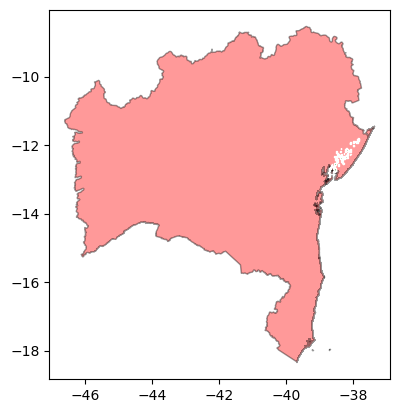

In [19]:
f, a = plt.subplots()
geo_s.plot(ax=a,edgecolor='k',facecolor='r',alpha=0.4)
geo_cp.plot(ax=a,edgecolor='w',facecolor='g',alpha=1.0);

- Selecionando poços (onshore ou offshore) que se tornaram públicos em 2022 e em 2023

In [20]:
# para onshore, 'T' 
p2022_m = p2022_s[p2022_s['TERRA_MAR'] == 'T']
p2022_tcm = p2022_m['CAMPO'].unique()

p2023_m = p2023_s[p2023_s['TERRA_MAR'] == 'T']
p2023_tcm = p2023_m['CAMPO'].unique()

- Selecionando campos relacionados aos poços

In [21]:
geo_cp_m_2022 = geo_cp.apply(lambda row: row[geo_cp['NOM_CAMPO'].isin(p2022_tcm)])
geo_cp_m_2023 = geo_cp.apply(lambda row: row[geo_cp['NOM_CAMPO'].isin(p2023_tcm)])

- Plota campos de interesse

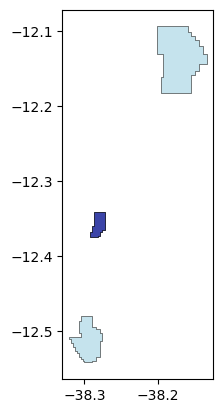

In [22]:
f, a = plt.subplots()

#geo_s.plot(ax=a,edgecolor='k',facecolor='gray',alpha=.2)
geo_cp_m_2022.plot(ax=a,edgecolor='k',lw=.5,facecolor='lightblue',alpha=.7)
geo_cp_m_2023.plot(ax=a,edgecolor='k',lw=.5,facecolor='darkblue',alpha=.7);

- Lista de campos participantes da RV

In [23]:
cp_list_2022 =  geo_cp_m_2022.NOM_CAMPO.tolist()
cp_list_2023 =  geo_cp_m_2023.NOM_CAMPO.tolist()

print('Atividade de divulgação em 2022 nos campos de: ')
print(*[x for x in cp_list_2022], sep=', ', end='.\n\n')

print('Atividade de divulgação em 2023 nos campos de: ')
print(*[x for x in cp_list_2023], sep=', ', end='.\n')

Atividade de divulgação em 2022 nos campos de: 
TIÊ, ARAÇÁS, MATA DE SÃO JOÃO.

Atividade de divulgação em 2023 nos campos de: 
TIÊ.


### RV finalística

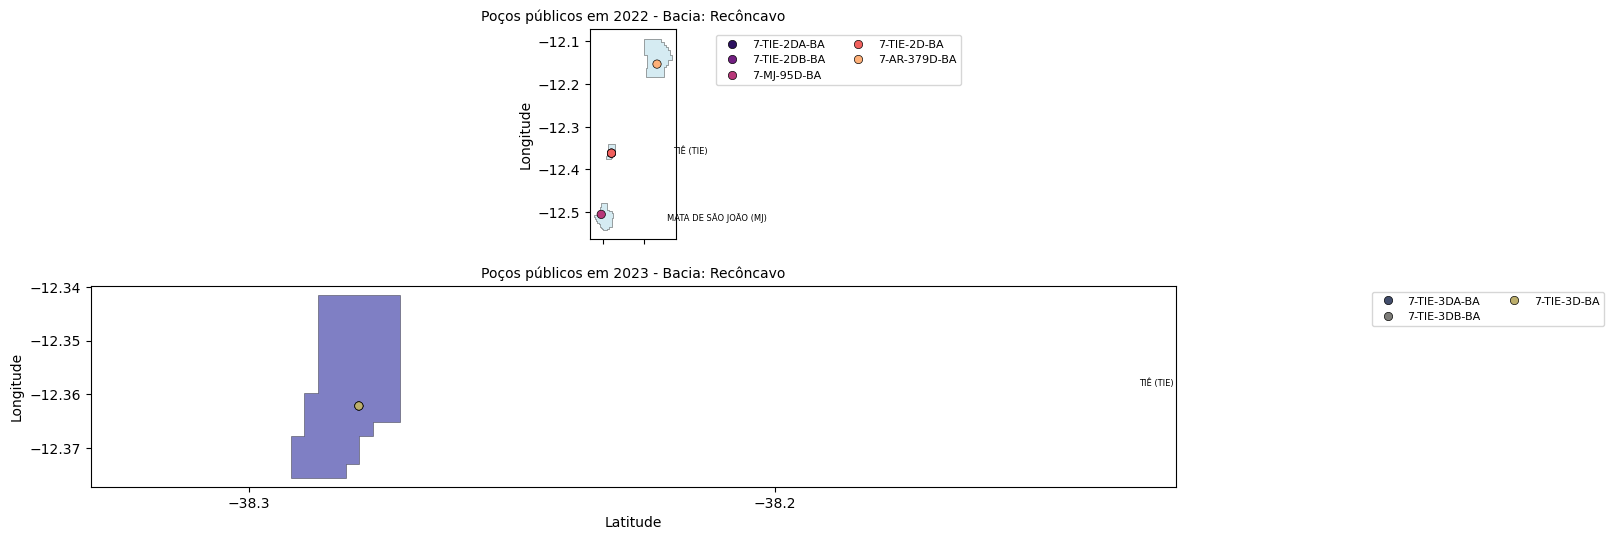

In [24]:
f, a = plt.subplots(2,1,figsize=(14,6),sharex=True)

# --- 2022

geo_cp_m_2022.plot(ax=a[0],edgecolor='k',lw=.5,facecolor='lightblue',alpha=.5)
p2022_m_1 = p2022_m[p2022_m['CAMPO'].isin(cp_list_2022)]
p2022_m_1f = sb.scatterplot(data=p2022_m_1,
                              x='LONGITUDE1',
                              y='LATITUDE_1',
                              hue='POCO',
                              marker='o',edgecolor='k',
                              palette='magma',
                              ax=a[0])
p2022_m_1f.legend(bbox_to_anchor=(1.4,1),ncol=2,fontsize=8)

a[0].set_ylabel('Longitude')
a[0].set_title(f'Poços públicos em 2022 - Bacia: {basin}',fontsize=10)

geo_cp_m_2022.apply(lambda x: a[0].annotate(
                            text=f'{x.NOM_CAMPO} ({x.SIG_CAMPO})',
                            xy=np.array(x.geometry.centroid.coords[0]) + np.array([0.15,0]), 
                            ha='left', 
                            va='center',
                            color = "black",
                            fontsize=6, 
                            weight='light'),                            
                            axis=1)


# --- 2023

geo_cp_m_2023.plot(ax=a[1],edgecolor='k',lw=.5,facecolor='darkblue',alpha=.5)
p2023_m_1 = p2023_m[p2023_m['CAMPO'].isin(cp_list_2023)]
p2023_m_1f = sb.scatterplot(data=p2023_m_1,
                             x='LONGITUDE_BASE_DD',
                             y='LATITUDE_BASE_DD',
                             hue='POCO',
                             marker='o',edgecolor='k',
                             palette='cividis',
                             ax=a[1])
p2023_m_1f.legend(bbox_to_anchor=(1.4,1),ncol=2,fontsize=8)

a[1].set_xlabel('Latitude')
a[1].set_ylabel('Longitude')
a[1].set_title(f'Poços públicos em 2023 - Bacia: {basin}',fontsize=10)

geo_cp_m_2023.apply(lambda x: a[1].annotate(
                            text=f'{x.NOM_CAMPO} ({x.SIG_CAMPO})',
                            xy=np.array(x.geometry.centroid.coords[0]) + np.array([0.15,0]), 
                            ha='left', 
                            va='center',
                            color = "black",
                            fontsize=6, 
                            weight='light'),                            
                            axis=1);
